In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [1]:
import keras
import numpy as np

Using TensorFlow backend.


In [3]:
np.random.normal(loc=[0.0,1.0], scale=[1.0,2.0], size = [5,2])

array([[ 0.29209789, -0.74966106],
       [-0.60792831,  0.67284918],
       [ 1.54224346, -1.82343729],
       [ 0.59063868, -1.53742831],
       [-0.18966952,  0.25167062]])

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [7]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='alexander-prutko', api_key='VocBkhjfvvSy6zHJ8789')

ModuleNotFoundError: No module named 'plotly'

In [5]:
from scipy.stats import multivariate_normal

In [6]:
# параметры распределений
mu0X, mu0Y, sigma0 = -1., -1., 1.
mu1X, mu1Y, sigma1 = 1., 1., 2.

In [7]:
# def sample(d0, d1, n=32):
#     x0 = d0.sample((n,))
#     x1 = d1.sample((n,))
#     y0 = torch.zeros((n, 1))
#     y1 = torch.ones((n, 1))
#     return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

# def sample(d0, d1, n=32):
#     x0 = d0.sample((n,))
#     x1 = d1.sample((n,))
#     y0 = tf.zeros((n, 1))
#     y1 = tf.ones((n, 1))
#     return tf.concat([x0, x1], 0), tf.concat([y0, y1], 0)   

def sample(d0, d1, n=32):
    x0 = d0(n)
    x1 = d1(n)
    y0 = np.zeros((n, 1))
    y1 = np.ones((n, 1))
    return np.vstack([x0, x1]), np.vstack([y0, y1])   

In [8]:
#d0 = torch.distributions.Normal(torch.tensor([mu0X, mu0Y]), torch.tensor([sigma0]))
#d1 = torch.distributions.Normal(torch.tensor([mu1X, mu1Y]), torch.tensor([sigma1]))

# d0 = MultivariateNormalDiag(loc=[mu0X, mu0Y], scale_diag=[sigma0, sigma0])
# d1 = MultivariateNormalDiag(loc=[mu1X, mu1Y], scale_diag=[sigma1, sigma1])

d0 = lambda n : np.random.normal(loc=[mu0X, mu0Y], scale=[sigma0, sigma0], size = [n,2])
d1 = lambda n : np.random.normal(loc=[mu1X, mu1Y], scale=[sigma1, sigma1], size = [n,2])

In [9]:
# aa = sample(d0, d1, 3)
# sess.run(aa)

sample(d0, d1, 3)

(array([[-2.59737862,  0.38926602],
        [-2.60451866, -1.98833494],
        [-3.26327122, -0.56241552],
        [ 4.08333754, -0.01031215],
        [ 1.78671676,  0.39726407],
        [-1.93307573, -1.7043614 ]]), array([[ 0.],
        [ 0.],
        [ 0.],
        [ 1.],
        [ 1.],
        [ 1.]]))

In [10]:
nx, ny = (300, 300)
x_ = np.linspace(-10, 10, nx)
y_ = np.linspace(-10, 10, ny)
xv, yv = np.meshgrid(x_, y_)
F0 = multivariate_normal([mu0X, mu0Y], sigma0)
F1 = multivariate_normal([mu1X, mu1Y], sigma1)

grid_list = list(zip(xv.reshape(1,-1).tolist()[0], yv.reshape(1,-1).tolist()[0]))
grid = np.reshape(grid_list, (nx,ny,2))
f0 = F0.pdf(grid)
f1 = F1.pdf(grid)
ratio = f1 / (f1 + f0)

In [262]:
# net = nn.Sequential(nn.Linear(2, 10), nn.SELU(), nn.Linear(10, 10), nn.SELU(), nn.Linear(10, 1))
# net_opt = optim.SGD(lr=1e-3, params=list(net.parameters()))
learning_rate = 0.01
initializer = tf.contrib.layers.xavier_initializer()
x = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# nn = tf.layers.dense(x, 10, activation=tf.nn.relu, kernel_initializer=initializer)
# nn = tf.layers.dense(nn, 10, activation=tf.nn.relu, kernel_initializer=initializer)
encoded = tf.layers.dense(x, 1, activation=None, kernel_initializer=initializer)

cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=encoded)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.nn.sigmoid(encoded)
correct_pred = tf.equal(tf.round(predicted), y)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.global_variables_initializer()

In [34]:
model = keras.Sequential()
# model.add(keras.layers.Dense(10, input_dim=2, kernel_initializer='glorot_normal', activation='relu'))
# model.add(keras.layers.Dense(10, kernel_initializer='glorot_normal', activation='relu'))
model.add(keras.layers.Dense(1, input_dim=2, kernel_initializer='glorot_normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
data = sample(d0, d1, 1000000)
model.fit(x=data[0], y=data[1], batch_size=100)

Epoch 1/1
1780600/2000000 [=========================>....] - ETA: 4s - loss: 0.3936 - acc: 0.8376

In [22]:
pred = model.predict(grid.reshape(-1,2))

In [28]:
dist = pred.reshape(nx, ny)

In [268]:
grid.reshape(-1,2).shape
type(grid.reshape(-1,2))
type(a[0])

numpy.ndarray

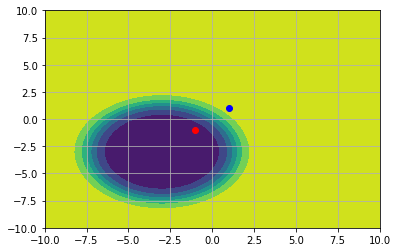

In [29]:
plt.contourf(x_,y_,ratio)
plt.scatter([-1],[-1], c='red')
plt.scatter([1],[1], c='blue')
plt.grid(True)

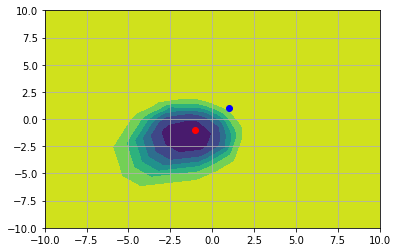

In [30]:
dist = dist.reshape((nx,ny))
h = plt.contourf(x_,y_,dist)
plt.scatter([-1],[-1], c='red')
plt.scatter([1],[1], c='blue')
plt.grid(True)

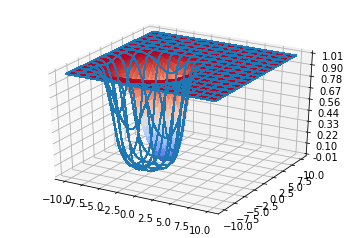

In [31]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(xv, yv, dist, cmap=cm.coolwarm, rstride=5, cstride=5,
                       linewidth=0, antialiased=False)
surf = ax.plot_wireframe(xv, yv, ratio, cmap=cm.coolwarm, rstride=20, cstride=20,
                       linewidth=1, antialiased=False)


ax.set_zlim(-0.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.show()

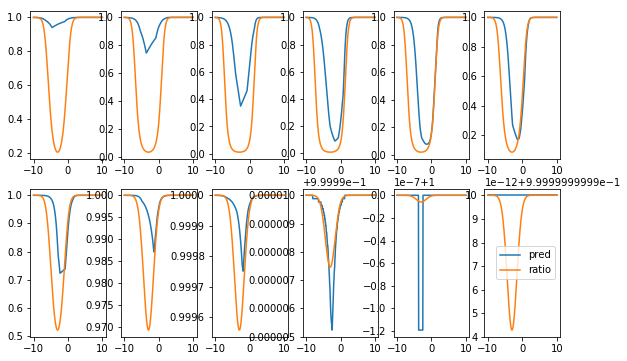

In [32]:
plt.rcParams['figure.figsize'] = [9.5, 6]
yy = 50
for i in range(12):
    plt.subplot(2, 6, i+1)
    plt.plot(x_, dist[yy+20*i,:], label='pred')
    plt.plot(x_, ratio[yy+20*i,:], label='ratio')
plt.legend();

In [261]:
data = [go.Surface(z=dist, x=xv, y=yv, opacity=1.00, colorscale='Greens'),
        go.Surface(z=ratio, x=xv, y=yv, opacity=0.8)]

NameError: name 'go' is not defined

In [18]:
py.iplot(data,filename='plot')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~alexander-prutko/0 or inside your plot.ly account where it is named 'plot'


[plotly plot](https://plot.ly/~alexander-prutko/0)